# Unsupervised learning model for estimating latent asset pricing factors 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/MyDrive/Zavrsni/Slike'

Mounted at /content/gdrive


### Load the dataset

In [ ]:
import io
import pandas as pd
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1cKKo10aVXmNmMprzCr9F00c_aD_NRiS_")
df = df.set_index('Time')
df.index.names = [None]

(293, 430)


### Do the principal component analysis ond the dataset

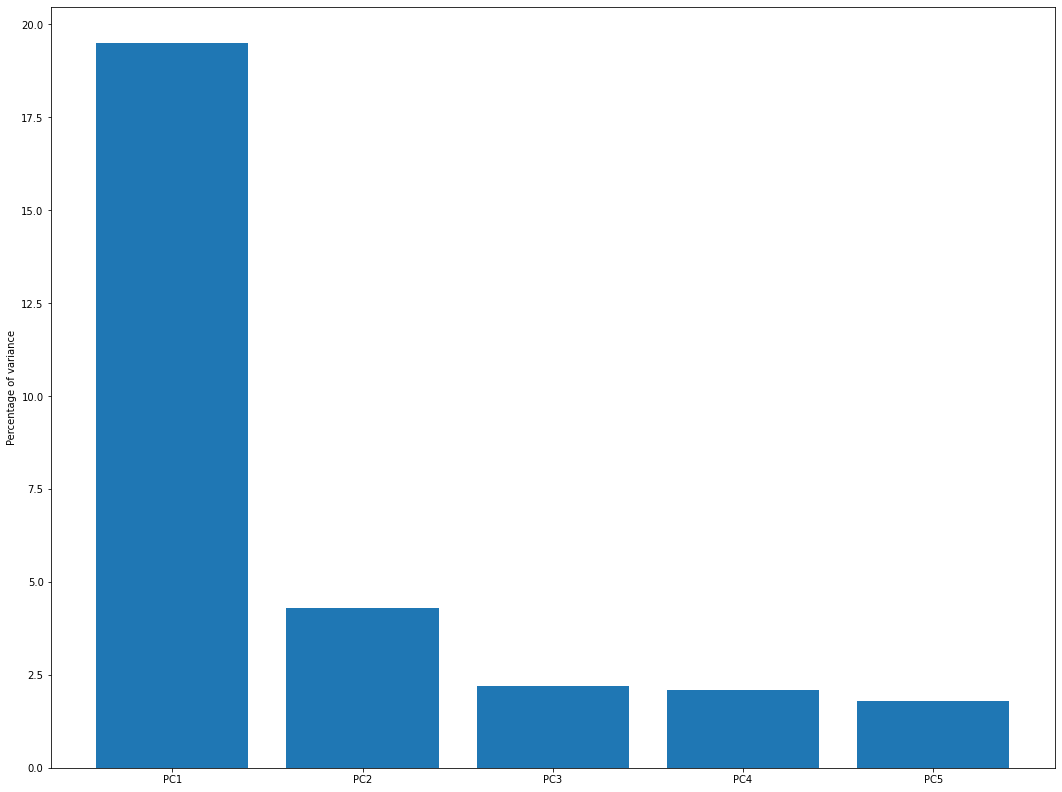

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, 6)]

plt.bar(x=range(1, 6), height=per_var[:5], tick_label=labels)
plt.ylabel("Percentage of variance")
plt.rcParams["figure.figsize"] = (10,6)
plt.savefig(f"{images_dir}/per_of_var.png")
plt.show()

### Find factor loadings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


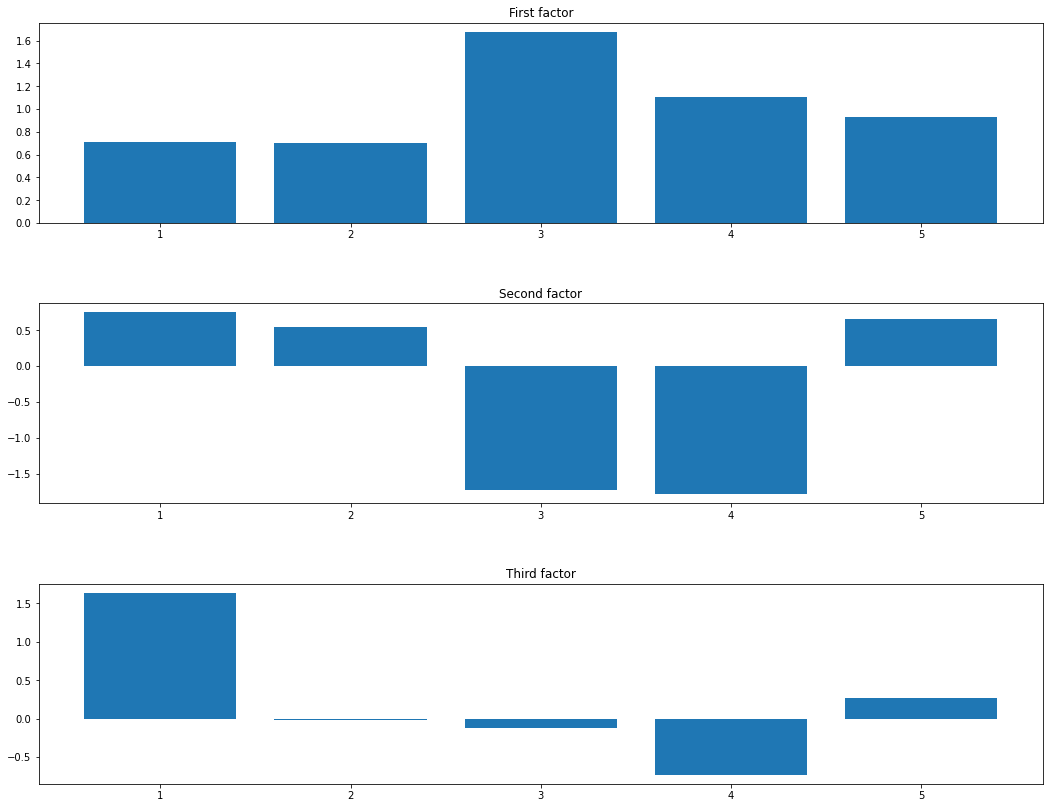

In [ ]:
from numpy.ma.core import sqrt
from numpy.linalg import eig
from sklearn.covariance import empirical_covariance
import math

N = len(df.columns)
df_trans = df.transpose()
T = len(df)
cov_x = (1/T)*np.dot(df_trans, df) - np.outer(df_trans.mean(axis = 1), df_trans.mean(axis = 1).transpose())
eigen_values, eigen_vectors = eig(cov_x)
eigen_vectors = np.asarray(eigen_vectors, dtype=float)
eigen_values = np.asarray(eigen_values, dtype=float)

D = np.diag(eigen_values)
q = np.dot(np.dot(eigen_vectors, D), eigen_vectors.transpose())

idx = eigen_values.argsort()[::-1]   
eigenVectorsTrans = eigen_vectors.transpose()
eigenValues = eigen_values[idx]
eigenVectors = eigenVectorsTrans[idx]

loads = np.array([eigenVectors[i] * sqrt(N) for i in range(len(eigenValues))])

plt.rcParams["figure.figsize"] = (18,14)

plt.subplot(3,1,1)
plt.bar(x=range(1, 6), height=loads[0][:5])
plt.title("First factor")

plt.subplot(3,1,2)
plt.bar(x=range(1, 6), height=loads[1][:5])
plt.title("Second factor")

plt.subplot(3,1,3)
plt.bar(x=range(1, 6), height=loads[2][:5])
plt.title("Third factor")

plt.subplots_adjust(hspace= 0.4)
plt.savefig(f"{images_dir}/pca_loads.png")
plt.show()

### Find loadings using rp-pca model, 𝛄=5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


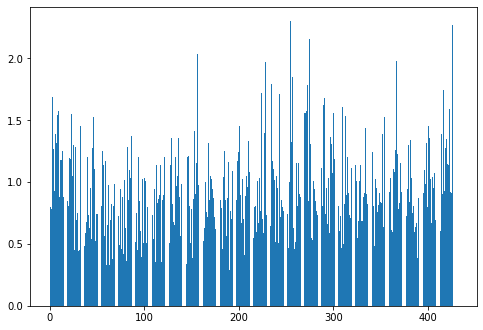

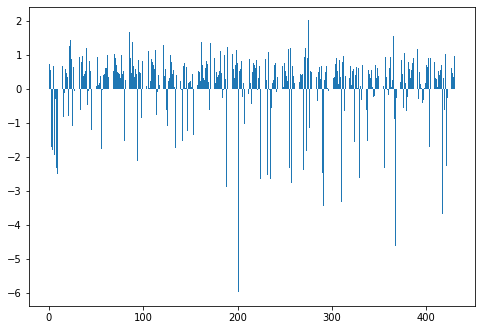

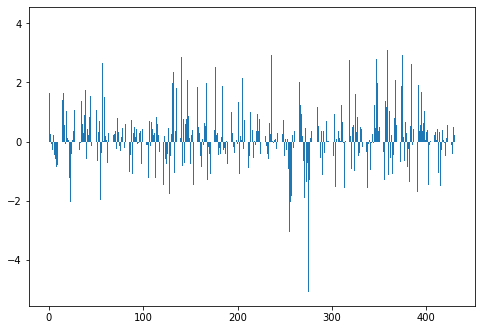

In [ ]:
gama = 5
df_trans = df.transpose()
T = len(df)
rp = (1/T)*np.dot(df_trans, df) + gama * np.outer(df_trans.mean(axis = 1), df_trans.mean(axis = 1).transpose())

eigen_values, eigen_vectors = eig(rp)
eigen_vectors = np.asarray(eigen_vectors, dtype=float)
eigen_values = np.asarray(eigen_values, dtype=float)

idx = eigen_values.argsort()[::-1]   
eigenVectorsTrans = eigen_vectors.transpose()
eigenValues = eigen_values[idx]
eigenVectors = eigenVectorsTrans[idx]

rp_loads = np.array([eigenVectors[i] * sqrt(N) for i in range(len(eigenValues))])

plt.bar(x=range(1, len(rp_loads[0]) + 1), height=rp_loads[0])
plt.show()
plt.bar(x=range(1, len(rp_loads[0]) + 1), height=rp_loads[1])
plt.show()
plt.bar(x=range(1, len(rp_loads[0]) + 1), height=rp_loads[2])
plt.show()

### Scatter plot for pca loadings and rp-pca loadings (𝛄=5)



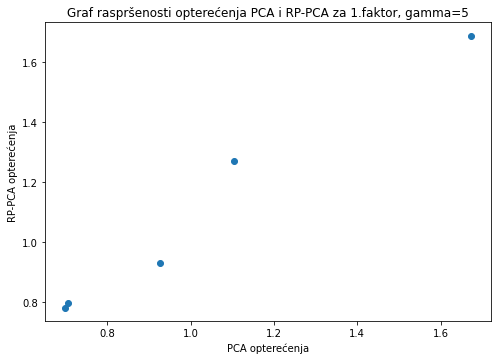

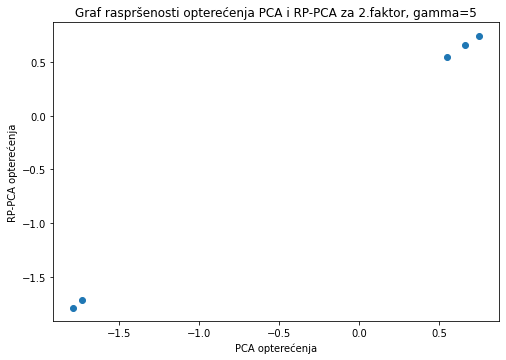

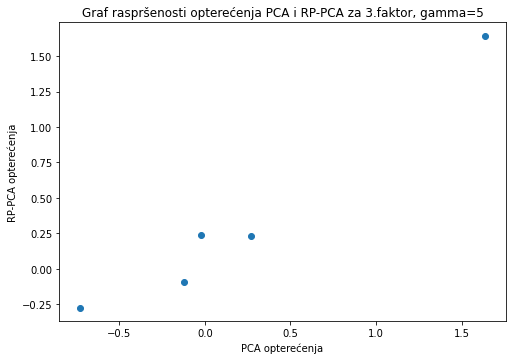

In [ ]:
plt.scatter(loads[0][:5], rp_loads[0][:5])
plt.xlabel("PCA opterećenja")
plt.ylabel("RP-PCA opterećenja")
plt.title("Graf raspršenosti opterećenja PCA i RP-PCA za 1.faktor, gamma=5")
plt.savefig(f"{images_dir}/loads_5_1")
plt.show()
plt.scatter(loads[1][:5], rp_loads[1][:5])
plt.xlabel("PCA opterećenja")
plt.ylabel("RP-PCA opterećenja")
plt.title("Graf raspršenosti opterećenja PCA i RP-PCA za 2.faktor, gamma=5")
plt.savefig(f"{images_dir}/loads_5_2")
plt.show()
plt.scatter(loads[2][:5], rp_loads[2][:5])
plt.xlabel("PCA opterećenja")
plt.ylabel("RP-PCA opterećenja")
plt.title("Graf raspršenosti opterećenja PCA i RP-PCA za 3.faktor, gamma=5")
plt.savefig(f"{images_dir}/loads_5_3")
plt.show()

### Scatter plot for pca loadings and rp-pca loadings (𝛄=20)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


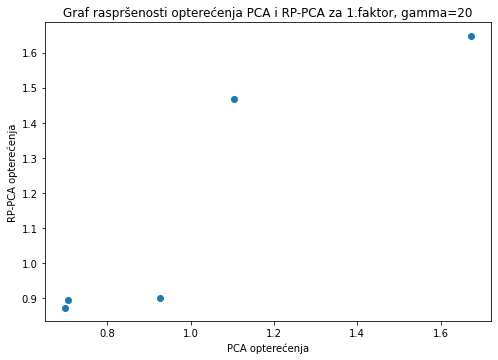

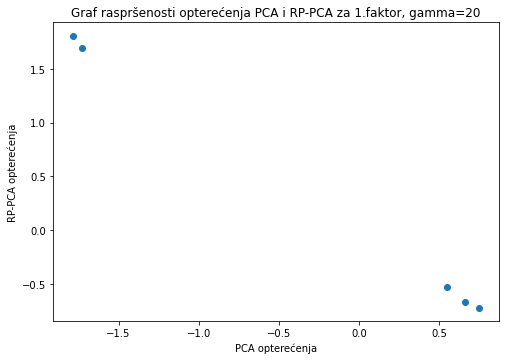

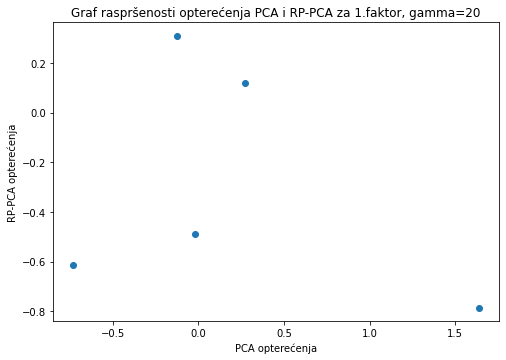

In [ ]:
gama = 50
rp = (1/T)*np.dot(df_trans, df) + gama * np.outer(df_trans.mean(axis = 1), df_trans.mean(axis = 1))
eigen_values, eigen_vectors = eig(rp)
eigen_vectors = np.asarray(eigen_vectors, dtype=float)
eigen_values = np.asarray(eigen_values, dtype=float)

idx = eigen_values.argsort()[::-1]   
eigenVectorsTrans = eigen_vectors.transpose()
eigenValues = eigen_values[idx]
eigenVectors = eigenVectorsTrans[idx]

# var_sum = sum(eigenValues)
# perc = np.array([eigenValues[i]/var_sum for i in range(0, len(eigenValues))])
# plt.bar(x=range(1, 6), height=perc[:5])
# plt.show()

rp_loads2 = np.array([eigenVectors[i] * sqrt(N) for i in range(len(eigenValues))])
#rp_loads2 = rp_loads2[:5]

plt.scatter(loads[0][:5], rp_loads2[0][:5])
plt.xlabel("PCA opterećenja")
plt.ylabel("RP-PCA opterećenja")
plt.title("Graf raspršenosti opterećenja PCA i RP-PCA za 1.faktor, gamma=20")
plt.savefig(f"{images_dir}/loads_20_1")
plt.show()
plt.scatter(loads[1][:5], rp_loads2[1][:5])
plt.xlabel("PCA opterećenja")
plt.ylabel("RP-PCA opterećenja")
plt.title("Graf raspršenosti opterećenja PCA i RP-PCA za 1.faktor, gamma=20")
plt.savefig(f"{images_dir}/loads_20_2")
plt.show()
plt.scatter(loads[2][:5], rp_loads2[2][:5])
plt.xlabel("PCA opterećenja")
plt.ylabel("RP-PCA opterećenja")
plt.title("Graf raspršenosti opterećenja PCA i RP-PCA za 1.faktor, gamma=20")
plt.savefig(f"{images_dir}/loads_20_3")
plt.show()

### Sharpe ration for each method

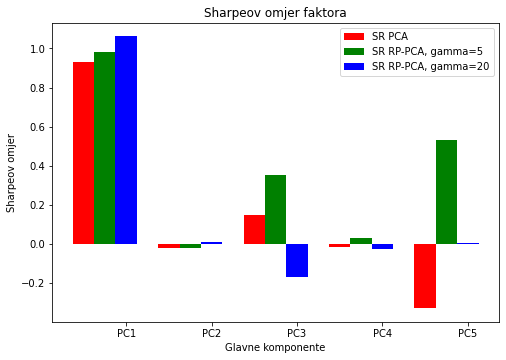

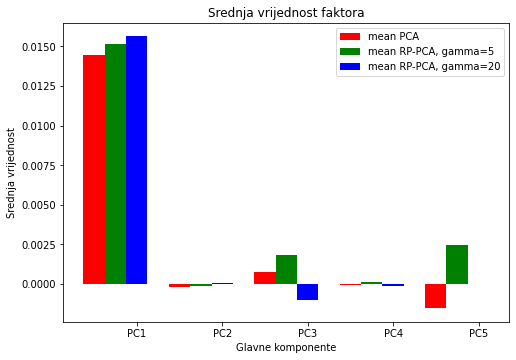

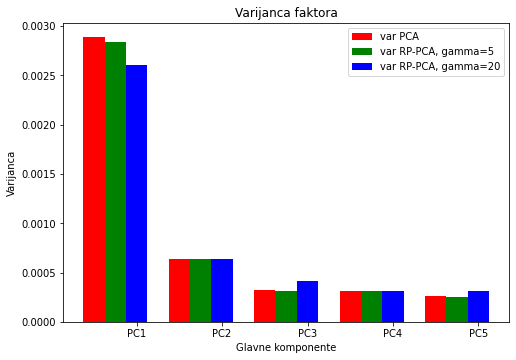

In [ ]:
import statistics
from numpy.core.fromnumeric import mean
from numpy.linalg import inv

X = np.array(df)

#pca
F = (1/N) * np.dot(X, loads.transpose())
F = F.transpose()

mean_F = np.array(mean(F, axis=1))
var_F = np.array([statistics.pvariance(F[i]) for i in range(0, len(F))])
sr = np.array([mean_F[i] * sqrt(12) / sqrt(var_F[i]) for i in range(0, len(mean_F))])

#rp-pca, gama = 5
F_rp = (1/N) * np.dot(X, rp_loads.transpose())
F_rp = F_rp.transpose()

mean_Frp = np.array(mean(F_rp, axis=1))
var_Frp = np.array([statistics.pvariance(F_rp[i]) for i in range(0, len(F_rp))])
sr_rp = np.array([mean_Frp[i] * sqrt(12) / sqrt(var_Frp[i]) for i in range(0, len(mean_Frp))])

#rp-pca, gama = 20
F_rp2 = (1/N) * np.dot(X, rp_loads2.transpose())
F_rp2 = F_rp2.transpose()

mean_Frp2 = np.array(mean(F_rp2, axis=1))
var_Frp2 = np.array([statistics.pvariance(F_rp2[i]) for i in range(0, len(F_rp2))])
sr_rp2 = np.array([mean_Frp2[i] * sqrt(12) / sqrt(var_Frp2[i]) for i in range(0, len(mean_Frp2))])

N = 5
ind = np.arange(N) 
width = 0.25
labels = ["PC" + str(x) for x in range(1, 6)]

bar1 = plt.bar(ind, sr[:5], width, color = 'r', tick_label=labels)

bar2 = plt.bar(ind+width, sr_rp[:5], width, color='g', tick_label=labels)

bar3 = plt.bar(ind+width*2, sr_rp2[:5], width, color = 'b', tick_label=labels)
  
plt.xlabel("Glavne komponente")
plt.ylabel('Sharpeov omjer')
plt.title("Sharpeov omjer faktora")
  
plt.legend( (bar1, bar2, bar3), ('SR PCA', 'SR RP-PCA, gamma=5', 'SR RP-PCA, gamma=20') )
plt.savefig(f"{images_dir}/sr_compare")
plt.show()

bar1 = plt.bar(ind, mean_F[:5], width, color = 'r', tick_label=labels)

bar2 = plt.bar(ind+width, mean_Frp[:5], width, color='g', tick_label=labels)

bar3 = plt.bar(ind+width*2, mean_Frp2[:5], width, color = 'b', tick_label=labels)
  
plt.xlabel("Glavne komponente")
plt.ylabel('Srednja vrijednost')
plt.title("Srednja vrijednost faktora")
  
plt.legend( (bar1, bar2, bar3), ('mean PCA', 'mean RP-PCA, gamma=5', 'mean RP-PCA, gamma=20') )
plt.savefig(f"{images_dir}/mean_compare")
plt.show()

bar1 = plt.bar(ind, var_F[:5], width, color = 'r', tick_label=labels)

bar2 = plt.bar(ind+width, var_Frp[:5], width, color='g', tick_label=labels)

bar3 = plt.bar(ind+width*2, var_Frp2[:5], width, color = 'b', tick_label=labels)
  
plt.xlabel("Glavne komponente")
plt.ylabel('Varijanca')
plt.title("Varijanca faktora")
  
plt.legend( (bar1, bar2, bar3), ('var PCA', 'var RP-PCA, gamma=5', 'var RP-PCA, gamma=20') )
plt.savefig(f"{images_dir}/var_compare")
plt.show()

### Calculate RMS alpha

In [ ]:
from sklearn import linear_model
# funkcija vraca array alphi za pojedini model (ovisno koji faktori mu se posalju)
def calculate_alphas(factors):
  i = 0
  alphas = []
  for name in df.columns:
    output = np.array(df[name].transpose())
    reg = linear_model.LinearRegression()
    factor = np.array(factors[i].transpose())
    reg.fit(factor.reshape(-1,1), output.reshape(-1,1))
    alpha = reg.intercept_
    alphas.append(alpha)
    i += 1
  return np.array(alphas)

In [ ]:
pca_alphas = calculate_alphas(F)
rp_pca_alphas = calculate_alphas(F_rp)
rp_pca_alphas2 = calculate_alphas(F_rp2)

RMS_pca = sqrt((1/430)*sum(math.pow(alpha, 2) for alpha in pca_alphas))
print(RMS_pca)
RMS_rppca = sqrt((1/430)*sum(math.pow(alpha, 2) for alpha in rp_pca_alphas))
print(RMS_rppca)
RMS_rppca2 = sqrt((1/430)*sum(math.pow(alpha, 2) for alpha in rp_pca_alphas2))
print(RMS_rppca2)

36198272231.80074
0.01567571185603617
0.01567149192278563
